Logistic Regression Metrics:
Accuracy: 0.5078
F1 Score: 0.5043
Precision: 0.5061
Recall: 0.5078


Random Forest Metrics:
Accuracy: 0.5255
F1 Score: 0.5236
Precision: 0.5246
Recall: 0.5255




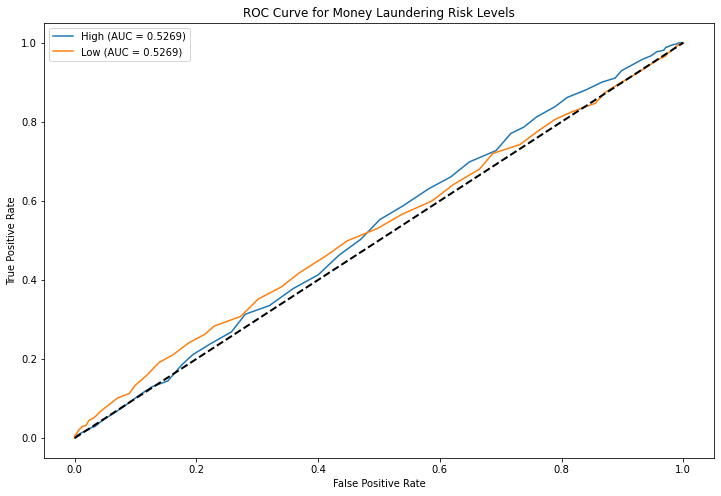


AUC Scores for Money Laundering Risk Levels:
      AUC Score
High   0.526882
Low    0.526882


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'Big_Black_Money_Dataset (2).csv'
data = pd.read_csv(file_path)

# Preprocessing
# Encode categorical columns
label_encoder = LabelEncoder()
data['Money Laundering Risk Score'] = label_encoder.fit_transform(data['Money Laundering Risk Score'])

# One-hot encoding for categorical features
data = pd.get_dummies(data, columns=['Country', 'Transaction Type', 'Industry', 'Destination Country'])

# Split the data into features and target
X = data.drop('Money Laundering Risk Score', axis=1)
y = data['Money Laundering Risk Score']

# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Logistic Regression model with OneVsRestClassifier
log_reg = OneVsRestClassifier(LogisticRegression(max_iter=1000))
log_reg.fit(X_train, y_train)

# Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
log_reg_preds = log_reg.predict(X_test)
rf_preds = rf_clf.predict(X_test)

# Evaluation Metrics
def print_metrics(y_true, y_pred, model_name):
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print("\n")

print_metrics(y_test, log_reg_preds, "Logistic Regression")
print_metrics(y_test, rf_preds, "Random Forest")

# ROC Curve and AUC for each class in the target variable
plt.figure(figsize=(12, 8))
y_proba_rf = rf_clf.predict_proba(X_test)
classes = label_encoder.classes_

for class_index, class_name in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test == class_index, y_proba_rf[:, class_index])
    auc_score = roc_auc_score(y_test == class_index, y_proba_rf[:, class_index])
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {auc_score:.4f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Money Laundering Risk Levels')
plt.legend()
plt.show()

# AUC Table for each class in the target variable
auc_scores = {class_name: roc_auc_score(y_test == class_index, y_proba_rf[:, class_index]) for class_index, class_name in enumerate(classes)}
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC Score'])
print("\nAUC Scores for Money Laundering Risk Levels:")
print(auc_df)
